In [24]:
import numpy as np
import matplotlib.pyplot as plt # Biblioteka do wizualizacji 2D
import scipy.signal as signal # Podstawowe funckcje przetwarzania sygnałów
import scipy.ndimage as nd # Podstawowe funkcje przetwarzania obrazów
from skimage import io
from skimage import color

In [ ]:
image = io.imread("xray.jpg")

print("Image shape: ", image.shape)
print("Image type: ", image.dtype)
print("Min/Max:", np.min(image), np.max(image))

image = color.rgb2gray(image)

plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) # normalize [0-1]

image = normalize(image)

print("Image shape: ", image.shape)
print("Image type: ", image.dtype)
print("Min/Max:", np.min(image), np.max(image))

plt.figure(dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

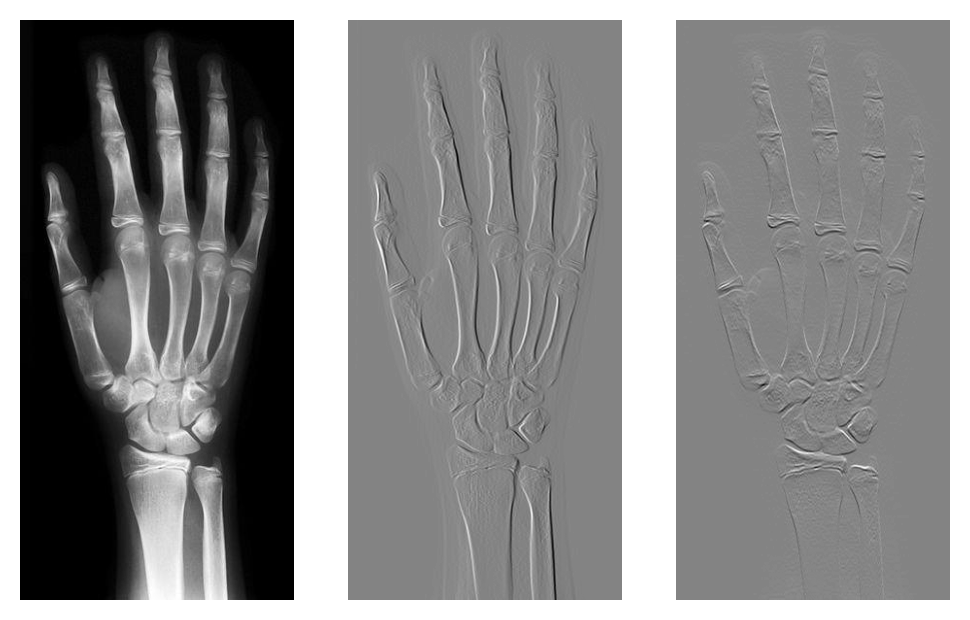

In [ ]:
gradient_y, gradient_x = np.gradient(image)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
def our_gradient(image, mode):
  gradient_x = np.zeros(image.shape)
  gradient_y = np.zeros(image.shape)
  if mode == 'central':
    gradient_x[:, 1:-1] = (image[:, 2:] - image[:, 0:-2]) / 2
    gradient_y[1:-1, :] = (image[2:, :] - image[0:-2, :]) / 2
  elif mode == 'forward':
    gradient_y[:-1, :] = (image[1:, :] - image[:-1, :])
    gradient_x[:, :-1] = (image[:, 1:] - image[:, :-1])
  elif mode == 'backward':
    gradient_y[1:, :] = (image[1:, :] - image[:-1, :])
    gradient_x[:, 1:] = (image[:, 1:] - image[:, :-1])

  return gradient_y, gradient_x
  
gradient_y, gradient_x = our_gradient(image, 'forward')

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
def our_gradient_filter(image, mode): # "central" # "forward" # "backward"
  window_x = np.array([
    [0, 0, 0],
    [-1, 0, 1],
    [0, 0, 0]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x) / 2
  gradient_y = signal.correlate2d(image, window_y) / 2
  # signal.correlate2d
  # signal.convolve2d
  return gradient_y, gradient_x
  
gradient_y, gradient_x = our_gradient_filter(image, 'central')

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
# Sobel, Prewitta - aproksymacja gradientu

def sobel_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  # gradient_x = signal.convolve2d(image, window_x)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

def prewitt_gradient(image):
  window_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]                     
  ])
  window_y = window_x.T
  gradient_x = signal.correlate2d(image, window_x)
  gradient_y = signal.correlate2d(image, window_y)
  # gradient_x = signal.convolve2d(image, window_x)
  # gradient_y = signal.convolve2d(image, window_y)
  return gradient_y, gradient_x

# magnituda gradientu , kąt gradientu (?)

In [ ]:
def uniform_filter(image, filter_size):
  return nd.uniform_filter(image, filter_size)

def gaussian_filter(image, sigma):
  return nd.gaussian_filter(image, sigma)

def median_filter(image, filter_size):
  return nd.median_filter(image, filter_size)

In [ ]:
def my_median_filter(image, filter_size=(3,3)):
  x = filter_size[0]//2
  y = filter_size[1]//2
  img_filtered = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      img_filtered[i,j] = np.median(image[i-x:i+x+1,j-y:j+y+1])
  return img_filtered

  # dodać warunki brzegowe

my_median_image = my_median_filter(image, (7,7))
median_image = median_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(my_median_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(median_image, cmap='gray')
plt.axis('off')

In [ ]:
def my_uniform_filter(image, filter_size=3):
  x = filter_size//2
  y = filter_size//2
  img_filtered = np.zeros(image.shape)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      img_filtered[i,j] = np.mean(image[i-x:i+x+1,j-y:j+y+1])
  return img_filtered

  # dodać warunki brzegowe

uni_image = uniform_filter(image, 7)
my_uni_image = my_uniform_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(my_uni_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')

(-0.5, 281.5, 597.5, -0.5)

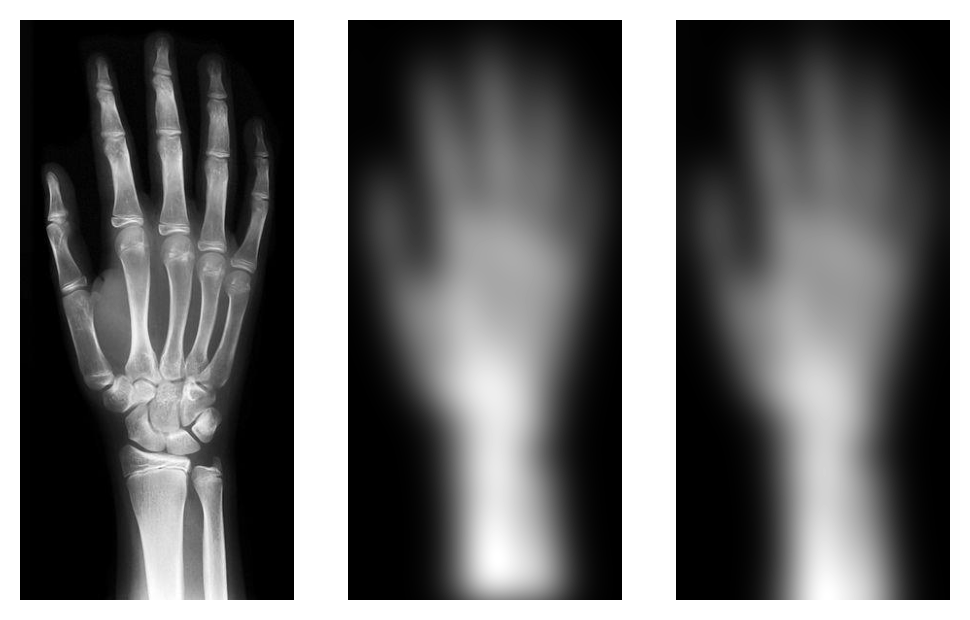

In [36]:
def convolution(oldimage, kernel):
  #image = Image.fromarray(image, 'RGB')
  image_h = oldimage.shape[0]
  image_w = oldimage.shape[1]
    
  kernel_h = kernel.shape[0]
  kernel_w = kernel.shape[1]
    
  if(len(oldimage.shape) == 3):
    image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2),(0,0)), mode='constant', constant_values=0).astype(np.float32)    
  elif(len(oldimage.shape) == 2):
    image_pad = np.pad(oldimage, pad_width=((kernel_h // 2, kernel_h // 2),(kernel_w // 2, kernel_w // 2)), mode='constant', constant_values=0).astype(np.float32)

  h = kernel_h // 2
  w = kernel_w // 2
    
  image_conv = np.zeros(image_pad.shape)
    
  for i in range(h, image_pad.shape[0]-h):
    for j in range(w, image_pad.shape[1]-w):
      #sum = 0
      x = image_pad[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
      x = x.flatten()*kernel.flatten()
      image_conv[i][j] = x.sum()
  h_end = -h
  w_end = -w
    
  if(h == 0):
    return image_conv[h:,w:w_end]
  if(w == 0):
    return image_conv[h:h_end,w:]
  
  return image_conv[h:h_end,w:w_end]


def my_gaussian_filter(image, sigma=3):
  filter_size = 2 * int(4 * sigma + 0.5) + 1
  gaussian_filter = np.zeros((filter_size, filter_size), np.float32)
  
  m = filter_size//2
  n = filter_size//2
    
  for x in range(-m, m+1):
    for y in range(-n, n+1):
      x1 = 2*np.pi*(sigma**2)
      x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
      gaussian_filter[x+m, y+n] = (1/x1)*x2
    
  im_filtered = np.zeros_like(image, dtype=np.float32)
  im_filtered[:, :] = convolution(image[:, :], gaussian_filter)

  return im_filtered

  # dodać warunki brzegowe

gaussian_image = gaussian_filter(image, 20)
my_gaussian_image = my_gaussian_filter(image, 20)

plt.figure(dpi=200)
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(my_gaussian_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')

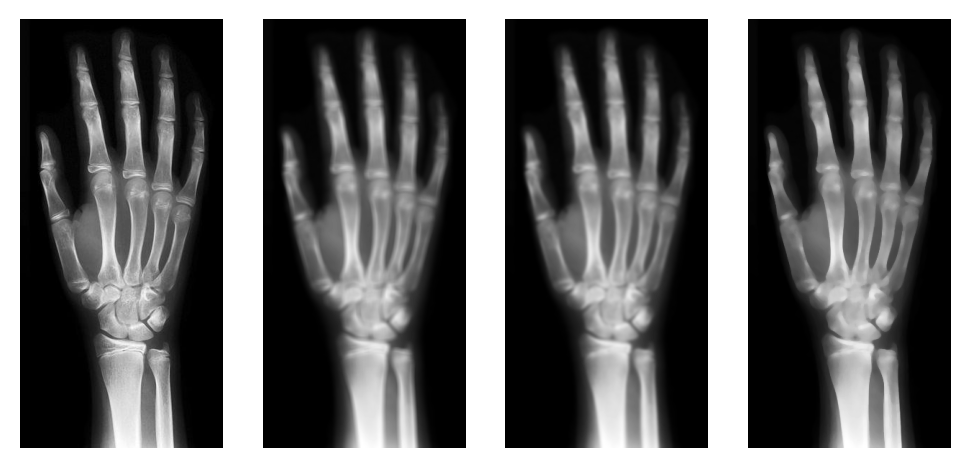

In [ ]:
uni_image = uniform_filter(image, 7)
gaussian_image = gaussian_filter(image, 2)
median_image = median_filter(image, 7)

plt.figure(dpi=200)
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(uni_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(gaussian_image, cmap='gray')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(median_image, cmap='gray')
plt.axis('off')
plt.show()

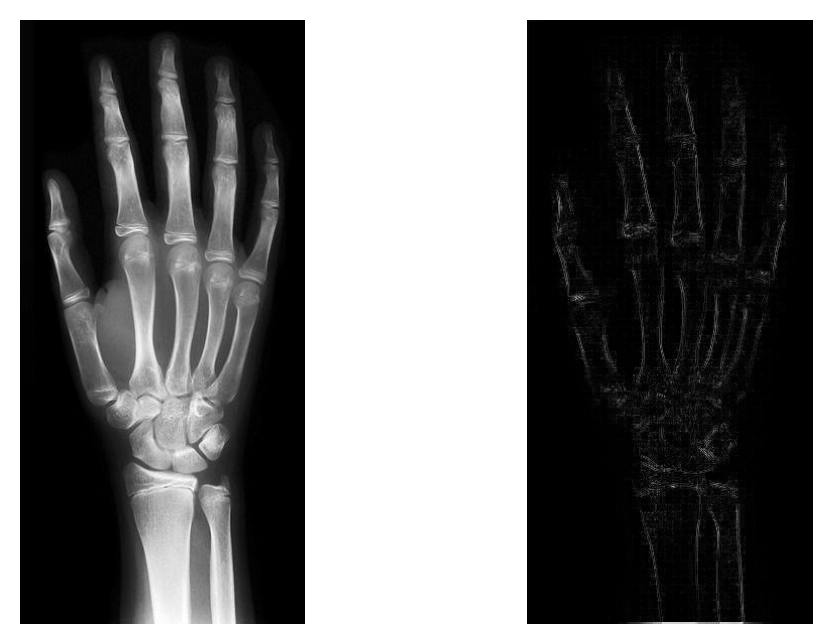

In [ ]:
def laplacian(image):
  window = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]                     
    ])
  laplacian_image = signal.correlate2d(image, window)
  return laplacian_image

laplacian_image = laplacian(image)

plt.figure(dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np.abs(laplacian_image), cmap='gray')
plt.axis('off')
plt.show()